In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rpy2.robjects as ro
from functools import partial
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.ipython import html
html.html_rdataframe = partial(html.html_rdataframe, table_class = "docutils")
%load_ext rpy2.ipython
import techniques

In [2]:
%%R
library(mlbench)
datasetcircle <- mlbench.circle(300)
XR_datasetcircle <- datasetcircle$x
LABELSR_datasetcircle <- datasetcircle$classes

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [3]:
from rpy2.robjects import numpy2ri
numpy2ri.activate()
x_df_circle = np.array(ro.r['XR_datasetcircle'])
labels_df_circle = np.array(ro.r['LABELSR_datasetcircle'])
labels_df_circle[labels_df_circle == 1] = -1
labels_df_circle[labels_df_circle == 2] = 1

In [4]:
#p_n = int(await input("Type how many neurons do you want to use in the hidden layer : "))
p_n = 75
k_rate = np.arange(start = 0.3, stop = 0.99, step = 0.01)
best_keep, best_acc = techniques.grid_searchCV_pruning(xin = x_df_circle, yin = labels_df_circle, p = p_n, keep_rate = k_rate, CV_groups = 10)

The model with best accuracy has the mean accuracy : 0.5733333333333334
The model parameters with best accuracy is using keep_rate : 0.4000000000000001


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df_circle, labels_df_circle, random_state = 0, train_size = 0.8)

In [6]:
ret = techniques.train_ELM_PRUNING(xin = X_train, yin = y_train, p = p_n, keep_rate = best_keep, control = True)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

In [7]:
best_w

array([[ 4.45111780e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 4.42954028e+05],
       [ 0.00000000e+00],
       [ 2.00666937e+02],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-3.28486958e+01],
       [ 1.22867747e+02],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 2.66406195e+01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-3.16076271e+04],
       [ 0.00000000e+00],
       [-5.87262881e-01],
       [ 0.00000000e+00],
       [-5.01793968e+03],
       [ 0.00000000e+00],
       [-6.74195534e-01],
       [ 0.00000000e+00],
       [ 9.83690190e-01],
       [ 1.39048176e+00],
       [-2.50991324e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.38688993e+01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-9.6

In [8]:
labels_df_reshaped = labels_df_circle.reshape(-1, 1)
mat_plot = np.concatenate((x_df_circle, labels_df_reshaped), axis = 1)
index_sort = 2
sorted_indices = np.argsort(mat_plot[:, index_sort])
mat_plot = mat_plot[sorted_indices]

/tmp/ipykernel_56419/752755325.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MZ[i, j] = np.sign(np.dot(h1, best_w))[0]


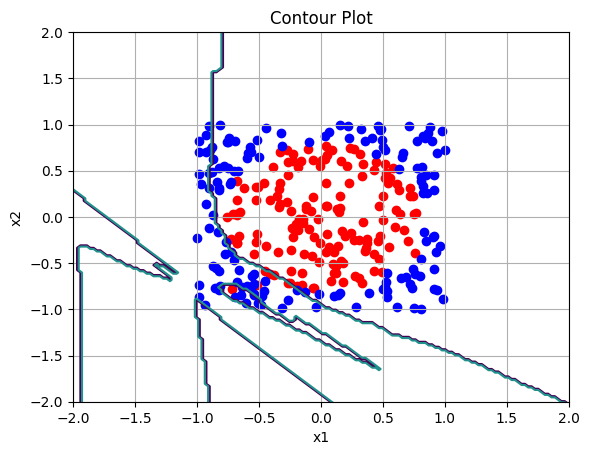

In [9]:
seqx1x2 = np.linspace(start = -4, stop = 4, num = 300)
np_grid = seqx1x2.shape[0]
shape = (np_grid, np_grid)
MZ = np.zeros(shape)
for i in range(np_grid):
    for j in range(np_grid):
        x1 = seqx1x2[i]
        x2 = seqx1x2[j]
        x1x2 = np.column_stack((x1, x2, 1))
        h1 = np.tanh(np.dot(x1x2, best_z))
        h1 = np.column_stack((h1, np.ones_like(h1[:, 0])))
        MZ[i, j] = np.sign(np.dot(h1, best_w))[0]

x1_points = mat_plot[: 150, 0 : 2]
x2_points = mat_plot[150 :, 0 : 2]
plt.contour(seqx1x2, seqx1x2, MZ, levels = 1)
plt.scatter(x1_points[:, 0], x1_points[:, 1], color = 'red', label = 'data1')
plt.scatter(x2_points[:, 0], x2_points[:, 1], color = 'blue', label = 'data2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()

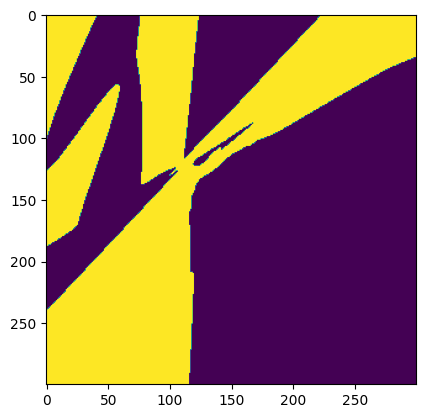

In [10]:
plt.imshow(MZ)